# Get started with CTDYN

In [1]:
import py_ctdyn as dyn

In [2]:
dir_out = "ctdyn_output"

In [3]:
ctdyn_param = {"outputs" : {"dir":"'{}'".format (dir_out)},
               }

In [4]:
dyn.run_ctdyn (ctdyn_param=ctdyn_param, verbose=True,
              rerun=False)

Running CTDYN with input file 'ctdyn_output/inlist_ctdyn'.


{'outputs': {'dir': "'ctdyn_output'"},
 'global': {},
 'profiles': {},
 'brent': {},
 'boundaries': {},
 'fields': {},
 'physics': {},
 'controls': {}}

In [5]:
filename = "{}/alpha.dat".format (dir_out)
df = dyn.read_radial_profiles (filename) 

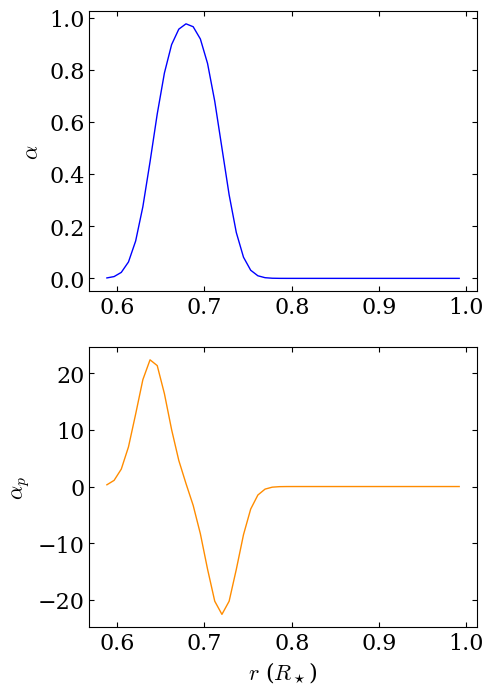

In [6]:
fig = dyn.plot_alpha (df)

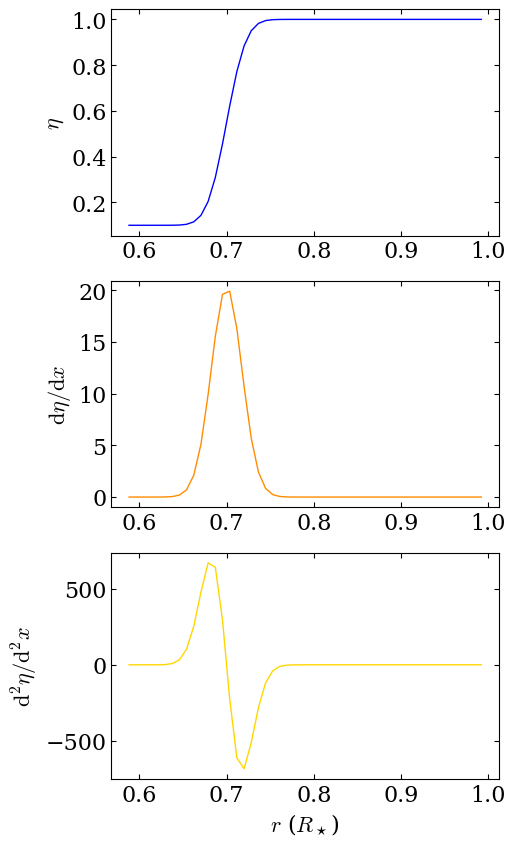

In [7]:
fig = dyn.plot_eta (df)

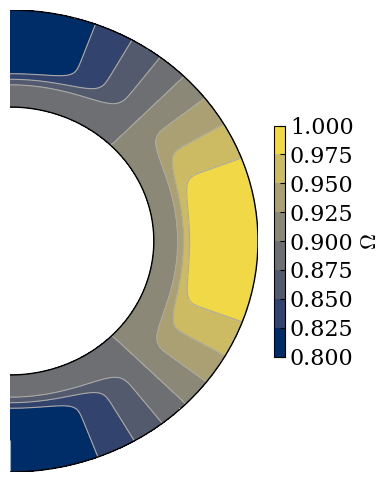

In [8]:
filename = "{}/omega.dat".format (dir_out)
r, theta, mesh = dyn.read_field_map (filename)
fig = dyn.plot_meridional_map (r, theta, mesh, 
                               label=r"$\Omega$", 
                               cmap="cividis")

/Users/sbreton/miniconda3/envs/main-3.9/lib/python3.9/site-packages/py_ctdyn/outputs.py:168: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = ax.pcolormesh (x, y, mesh_m, cmap=cmap)


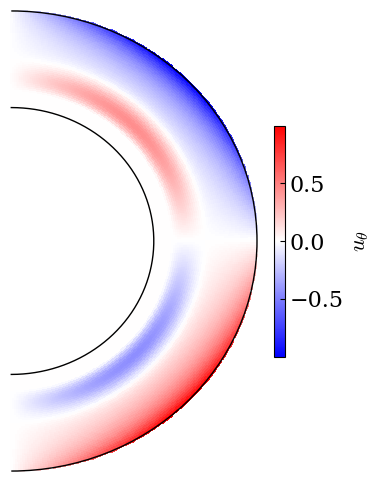

In [9]:
filename = "{}/utheta.dat".format (dir_out)
r, theta, mesh = dyn.read_field_map (filename)
fig = dyn.plot_meridional_map (r, theta, mesh, 
                               label=r"$u_\theta$", cmap="bwr", 
                               mode="pcolormesh", contour=False)

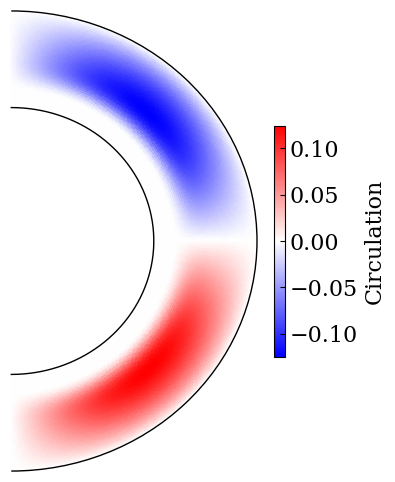

In [10]:
filename = "{}/stream.dat".format (dir_out)
r, theta, mesh = dyn.read_field_map (filename)
fig = dyn.plot_meridional_map (r, theta, mesh, 
                               label=r"Circulation", cmap="bwr", 
                               mode="pcolormesh", contour=False)

In [11]:
ii, time = 1, 1

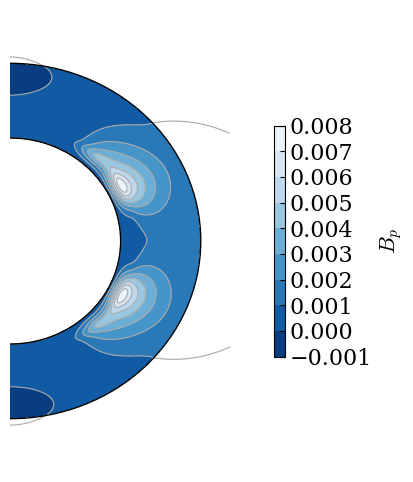

In [12]:
filename = "{}/pfld.{}.t{}.A00".format (dir_out, str (ii).zfill (6), 
                                        str (time).zfill (2))
r, theta, mesh = dyn.read_field_map (filename)
fig = dyn.plot_meridional_map (r, theta, mesh, label=r"$B_p$",
                               mode="contourf")

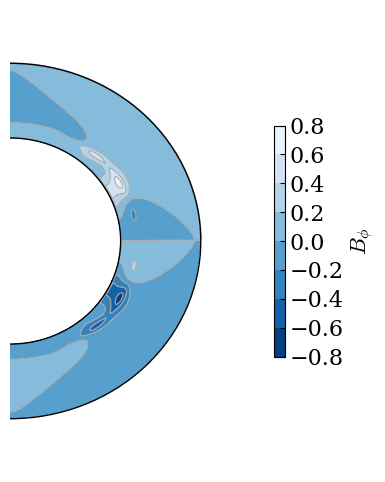

In [13]:
filename = "{}/tfld.{}.t{}.A00".format (dir_out, str (ii).zfill (6), 
                                        str (time).zfill (2))
r, theta, mesh = dyn.read_field_map (filename)
fig = dyn.plot_meridional_map (r, theta, mesh, label=r"$B_\phi$")

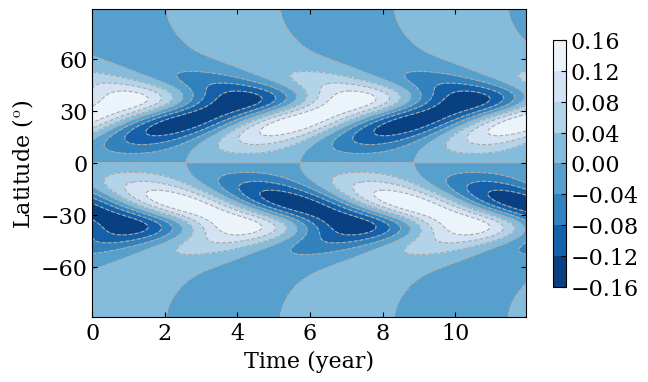

In [14]:
filename = "{}/butf.000001.a00".format (dir_out)
t, theta, mesh = dyn.read_butterfly_diagram (filename)
fig = dyn.plot_butterfly_diagram (t, theta, mesh)

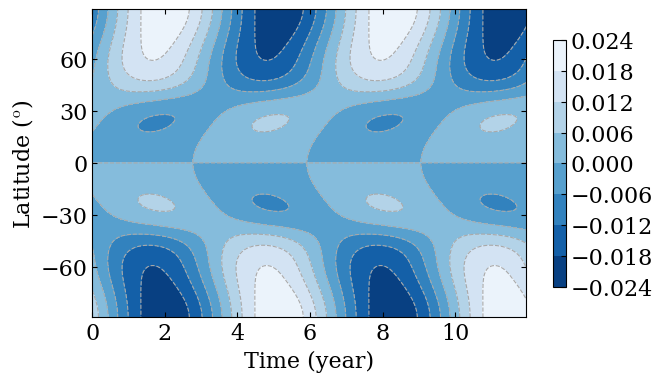

In [15]:
filename = "{}/brbp.000001.a00".format (dir_out)
t, theta, mesh = dyn.read_butterfly_diagram (filename)
fig = dyn.plot_butterfly_diagram (t, theta, mesh)